## Motifs mapping and analysis

In [1]:
%%bash
export PATH=/Users/alena/meme/bin:/Users/alena/meme/libexec/meme-5.5.2:$PATH
sites2meme /Users/alena/Desktop/thesis/dnabert_project/H2a_xs139ph/2_epochs/motifs_discovered_new > /Users/alena/Desktop/thesis/dnabert_project/tomtom_test/meme_motifs_H2a_xs139ph.txt

Converted 52 motifs.
0 conversion errors.


In [2]:
%%bash
export PATH=/Users/alena/meme/bin:/Users/alena/meme/libexec/meme-5.5.2:$PATH
tomtom -no-ssc -oc /Users/alena/Desktop/thesis/dnabert_project/tomtom_test -verbosity 1 -min-overlap 5 -dist pearson -evalue -thresh 10.0 /Users/alena/Desktop/thesis/dnabert_project/tomtom_test/meme_motifs_H2a_xs139ph.txt /Users/alena/meme-5.5.2/db/motif_databases/MOUSE/HOCOMOCOv11_full_MOUSE_mono_meme_format.meme

In [3]:
import pandas as pd
import plotly.express as px
from collections import Counter
from itertools import chain
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

/Users/alena/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
pd.options.mode.chained_assignment = None

In [5]:
def create_barchart(df, y_column, file_name, title):
    ax = sns.barplot(x='count', y=y_column, data=df, color='steelblue')

    plt.xlabel('Count')
    plt.ylabel(y_column)
    plt.title(f'Most frequent {title}')
    
    max_count = df['count'].max()
    tick_step = 1  
    plt.xticks(range(0, max_count + 1, tick_step))
    
#     plt.gcf().set_size_inches(5, 7)
    plt.savefig(f'{file_name}_{y_column}.png', format='png',
                dpi=500,  bbox_inches='tight')
    plt.show()

In [6]:
def count_terms(column_name):
    process = df[column_name].to_list()
    go_list = []
    for i in process:
        for j in i.split(';'):
            go_list.append(j.split('[')[0].strip())
    showcount = Counter(go_list)
    count_go = pd.DataFrame.from_dict(showcount, orient='index', columns=['count'])        
    count_go = count_go.reset_index()
    count_go = count_go.rename(columns={'index': column_name})
    count_go = count_go.sort_values('count', ascending=False)
    count_go = count_go.head(10)
    return count_go

In [7]:
df = pd.read_csv(f'/Users/alena/Desktop/thesis/dnabert_project/tomtom_test/tomtom.tsv', sep='\t')
db = pd.read_csv('databases/HOCOMOCOv11_full_annotation_MOUSE_mono.tsv', sep='\t')
db_2 = pd.read_csv('databases/HOCOMOCOv11_core_annotation_MOUSE_di.tsv', sep='\t')
uniprot = pd.read_csv('databases/uniprot_result.tsv', sep='\t')

panther = pd.read_csv('databases/PTHR17.0_mouse.txt', sep='\t', header=None, 
                      usecols=[1,2,3,4,5], 
                      names=['id', 'tf', 'pthr_num', 'family', 'subfamily'])

df = df.sort_values(['E-value', 'q-value', 'p-value'])

combined_df = pd.concat([db, db_2], ignore_index=True)
db = combined_df.drop_duplicates(subset='Model', keep='first')

uniprot = uniprot.drop(columns=['Reviewed', 'From', 'Organism',
                     'Cofactor', 'Active site', 'Absorption'])
df = df.merge(db, how='left', left_on = 'Target_ID', right_on='Model')
df = df.merge(uniprot, how='left', left_on = 'UniProt ID', right_on='Entry Name')
df = df.merge(panther, how='left', left_on = 'UniProt AC', right_on='id')
df = df[df['p-value'] <= 0.05]
df = df[df['E-value'] <= 0.05]
df = df[df['q-value'] <= 0.05]
print(df.shape)

(14, 52)


In [8]:
len(df['Transcription factor'].unique())

14

In [9]:
df['Transcription factor'].unique()

array(['Sp3', 'Sp2', 'E2f6', 'Klf3', 'Klf1', 'Sp1', 'Egr1', 'Prdm16',
       'Mafk', 'Klf6', 'E2f3', 'E2f1', 'Sp4', 'Nfe2'], dtype=object)

In [10]:
element = 'H2a_xs139ph'

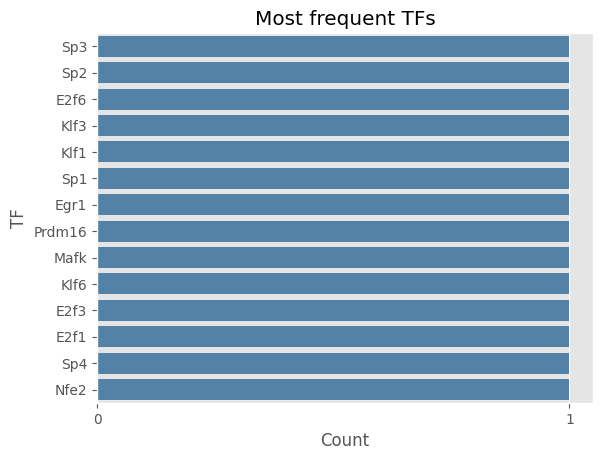

In [11]:
df['Transcription factor'] = df['Transcription factor'].fillna('nan')
tf = df['Transcription factor'].value_counts().reset_index()
tf = tf.rename(columns={'index': 'TF', 'Transcription factor':'count'})
tf = tf[tf != 'nan']
create_barchart(tf, 'TF', element, 'TFs')

- удалить дубликаты по TF

In [12]:
df = df.drop_duplicates('Transcription factor').reset_index(drop=True)

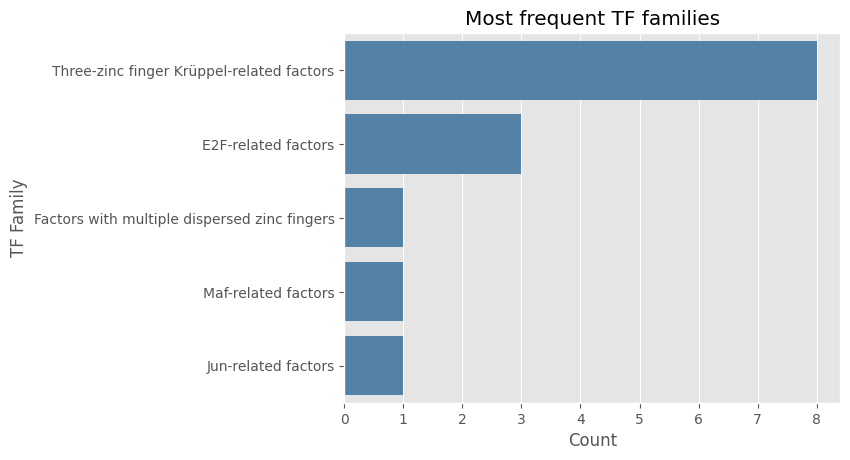

In [13]:
df['TF family'] = df['TF family'].fillna('nan')
df['TF family'] = df['TF family'].apply(lambda x: x.split('{')[0])
tf_family = df['TF family'].value_counts().reset_index()
tf_family = tf_family.rename(columns={'index': 'TF Family', 'TF family':'count'})
tf_family = tf_family[tf_family != 'nan']
create_barchart(tf_family, 'TF Family', element, 'TF families')

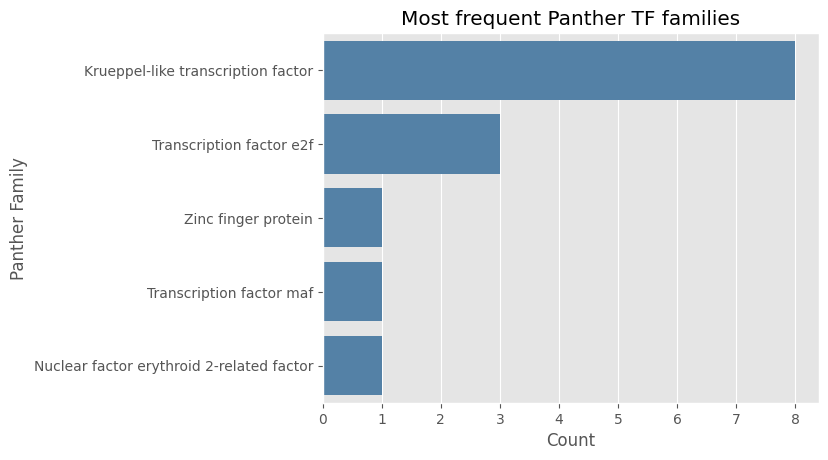

In [14]:
df['family'] = df['family'].fillna('Nan')
df['family'] = df['family'].apply(lambda x: x.capitalize()) 
panther_family = df['family'].value_counts().reset_index()
panther_family = panther_family.rename(columns={'index': 'Panther Family', 'family':'count'})
panther_family = panther_family[panther_family != 'Nan']
create_barchart(panther_family, 'Panther Family', element, 'Panther TF families')

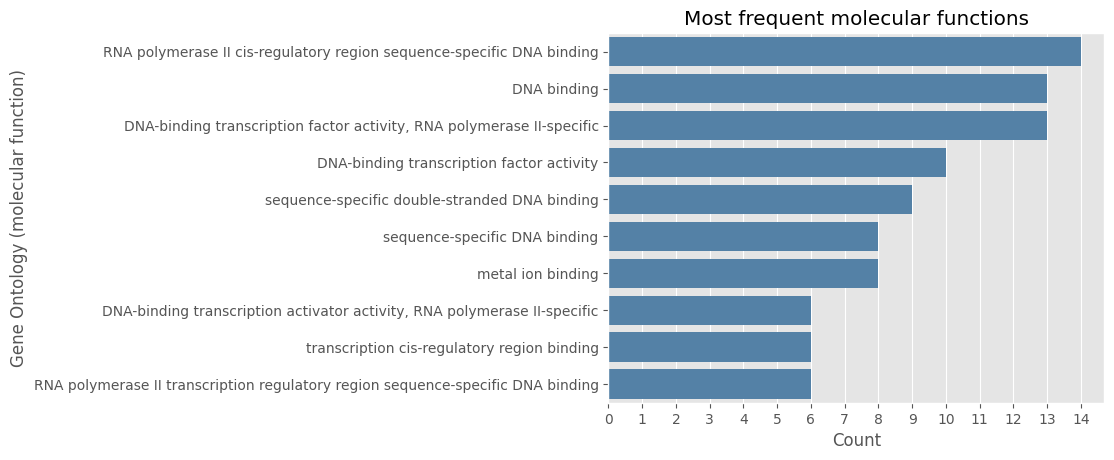

In [15]:
# df = df.dropna(subset=['Gene Ontology (molecular function)'])
molecular_function = count_terms('Gene Ontology (molecular function)')
create_barchart(molecular_function, 'Gene Ontology (molecular function)', element, 'molecular functions')

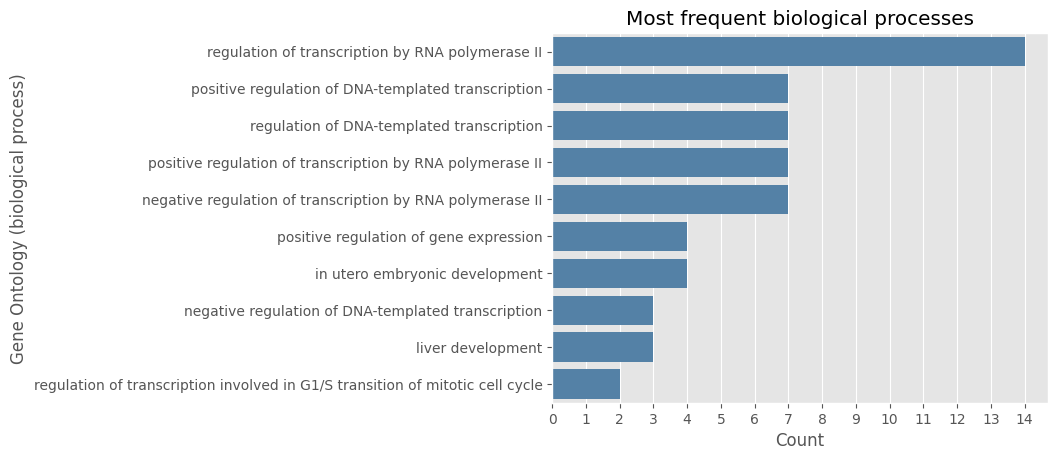

In [16]:
biological_process = count_terms('Gene Ontology (biological process)')
create_barchart(biological_process, 'Gene Ontology (biological process)', element, 'biological processes')

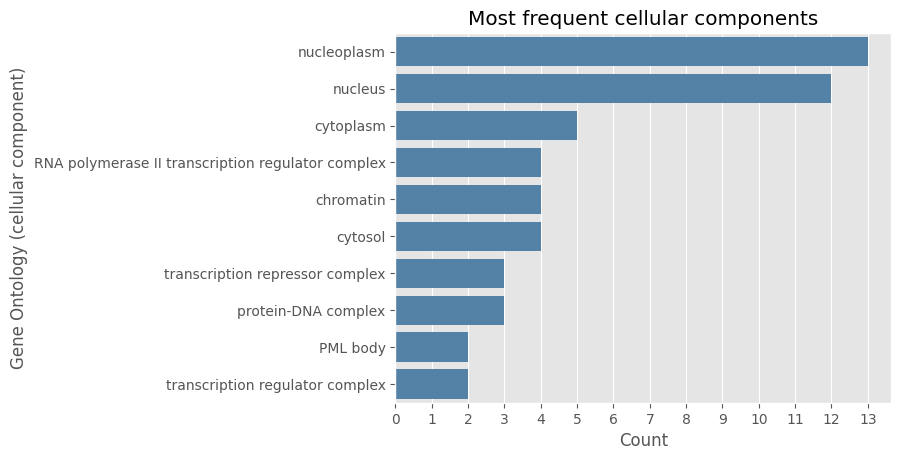

In [17]:
biological_process = count_terms('Gene Ontology (cellular component)')
create_barchart(biological_process, 'Gene Ontology (cellular component)', element, 'cellular components')

In [18]:
df['model'] = element
df.to_csv(f'{element}_motifs.csv')

In [19]:
df.shape

(14, 53)